# Victoria Offenders by Gender

This portion of the project analyse Melbourne crime incidences by gender. We would look into;
1) Which gender is most likely to commit a offense 

2) Which Principal Offence is more likely to be committed by each gender

3) Any significant changes in the last 5 years

** Miscellaneous Offences are inclusive of Covid-related crime

Resources: https://www.abs.gov.au/statistics/people/crime-and-justice/recorded-crime-offenders/2020-21#victoria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading in Data from file
filename = "offenders.csv"
file = f"resources\{filename}"
vic_offenders = pd.read_csv(file)
vic_offenders = vic_offenders.rename(columns={'Unnamed: 0': 'Year_Period'})
vic_offenders.tail()

,Year_Period,Gender,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
21,2016–17,Female,27,3343,81,157,259,62,375,3713,297,840,1939,687,620,1278,866,1305,15849
22,2017–18,Female,18,3378,81,162,264,87,359,3437,294,856,1931,886,609,1562,980,1039,15943
23,2018–19,Female,17,3500,83,149,322,107,374,3814,307,870,2045,938,559,1375,1083,814,16357
24,2019–20,Female,20,3431,73,151,307,120,344,3476,261,876,2258,912,535,889,1097,1523,16273
25,2020–21,Female,31,3447,85,123,328,106,291,2453,111,727,2129,792,577,657,1032,5104,17993


In [3]:
# Update all number fields to numeric
vic_offenders = vic_offenders.astype({'Homicide and related offences': 'int64', 
                                      'Acts intended to cause injury': 'int64', 
                                      'Sexual assault and related offences': 'int64', 
                                      'Dangerous_negligent acts': 'int64', 
                                      'Abduction_harassment': 'int64', 
                                      'Fare evasion': 'int64', 
                                      'Fraud_deception': 'int64', 
                                      'Illicit drug offences': 'int64',                                       
                                      'Weapons_explosives': 'int64', 
                                      'Property damage and environmental pollution': 'int64', 
                                      'Public order offences': 'int64', 
                                      'Offences against justice': 'int64',
                                      'Miscellaneous offences': 'int64'
                                     })
# Statistical overview of dataset
vic_offenders.describe()

,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,68.769231,7761.576923,760.423077,428.807692,643.884615,272.653846,1157.692308,5779.769231,496.230769,1148.000000,4156.038462,2034.346154,1727.961538,5113.038462,1848.807692,5545.115385,38943.115385
std,52.086319,5048.088701,722.148415,312.694102,506.326877,207.422649,859.790708,2430.474049,730.481009,398.334131,2579.245215,1649.180886,1171.816214,4227.819755,1312.543181,4287.053023,23211.619139
min,6.000000,2151.000000,28.000000,91.000000,91.000000,54.000000,291.000000,2453.000000,0.000000,600.000000,1091.000000,239.000000,535.000000,657.000000,396.000000,814.000000,14401.000000
25%,19.250000,3148.250000,66.250000,124.000000,241.000000,73.500000,370.750000,3738.250000,0.000000,784.500000,1933.000000,597.250000,610.000000,1517.750000,769.500000,1650.000000,16191.250000
50%,60.000000,6707.500000,622.000000,370.000000,431.000000,248.000000,866.000000,4840.000000,186.000000,1089.000000,3833.500000,1558.000000,1461.000000,2785.500000,1228.500000,5230.000000,35542.000000
75%,116.500000,13291.000000,1511.750000,737.750000,1147.000000,450.250000,1768.250000,6646.500000,497.500000,1513.250000,6695.500000,3481.000000,2823.500000,8621.500000,2966.000000,9119.000000,61126.250000
max,147.000000,14355.000000,1686.000000,896.000000,1598.000000,683.000000,2759.000000,11178.000000,2259.000000,1671.000000,7658.000000,4819.000000,3299.000000,13069.000000,4229.000000,14586.000000,69244.000000


# Principal Offences by Male

In [4]:
# data breakdown
# Retrieving last 5 years of Male data
vic_male_offenders = vic_offenders.loc[(vic_offenders['Gender'] == "Male")].sort_values('Year_Period', ascending=True).tail()
vic_male_offenders.describe()

,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,122.200000,13989.000000,1617.800000,803.800000,1423.000000,523.800000,1592.600000,4499.400000,1288.400000,1586.000000,6988.20000,4485.000000,2508.000000,6516.000000,3913.000000,7941.800000,59798.000000
std,16.634302,230.552597,59.381815,54.426097,112.760809,112.963268,188.049993,506.211715,519.378764,81.856582,491.85384,532.779504,217.915121,2106.517624,206.066737,3768.494288,1275.941025
min,94.000000,13737.000000,1532.000000,760.000000,1311.000000,379.000000,1308.000000,3617.000000,516.000000,1485.000000,6464.00000,3553.000000,2279.000000,3544.000000,3697.000000,5356.000000,57912.000000
25%,123.000000,13898.000000,1596.000000,767.000000,1350.000000,468.000000,1532.000000,4568.000000,1010.000000,1550.000000,6649.00000,4533.000000,2331.000000,5360.000000,3767.000000,6111.000000,59567.000000
50%,126.000000,13920.000000,1617.000000,796.000000,1394.000000,525.000000,1602.000000,4655.000000,1482.000000,1554.000000,6842.00000,4731.000000,2472.000000,7044.000000,3914.000000,6562.000000,59642.000000
75%,131.000000,14035.000000,1658.000000,800.000000,1462.000000,564.000000,1748.000000,4808.000000,1713.000000,1670.000000,7340.00000,4789.000000,2669.000000,7675.000000,3958.000000,7094.000000,60551.000000
max,137.000000,14355.000000,1686.000000,896.000000,1598.000000,683.000000,1773.000000,4849.000000,1721.000000,1671.000000,7646.00000,4819.000000,2789.000000,8957.000000,4229.000000,14586.000000,61318.000000


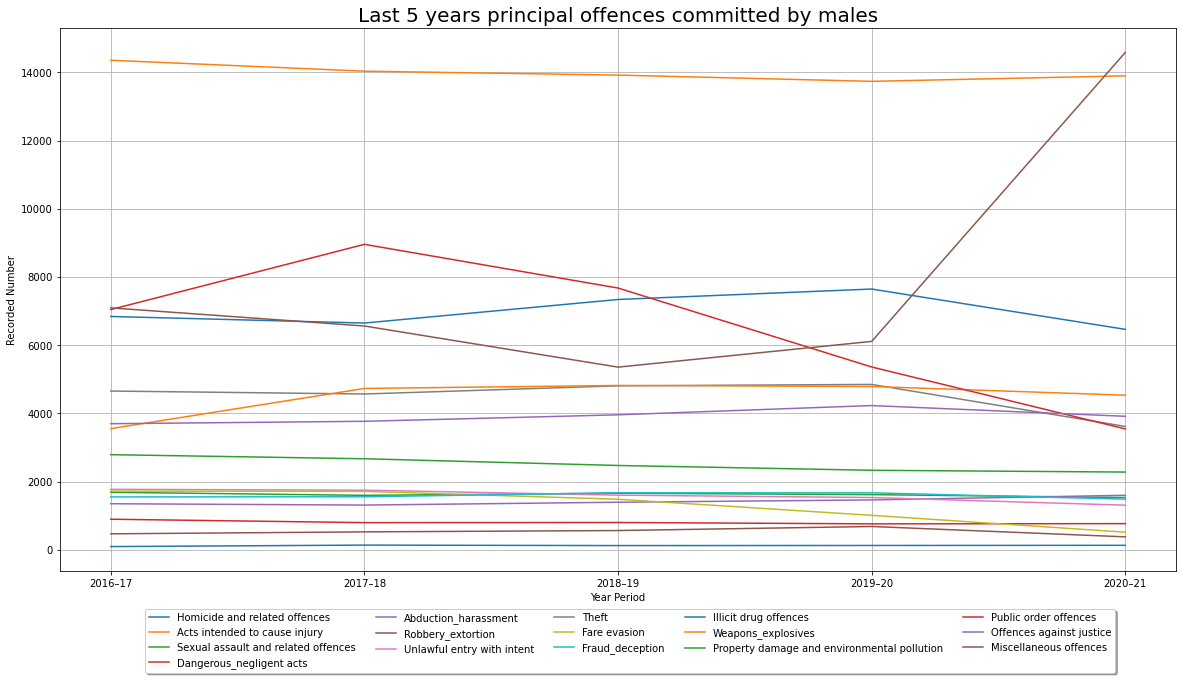

In [5]:
# Line graph to show trend in the last 5 years
plt.figure(figsize=(20, 10))
for col in vic_male_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total'):
        plt.plot(vic_male_offenders['Year_Period'], vic_male_offenders[col], label= col)

plt.title(f"Last 5 years principal offences committed by males", fontsize=20)
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.95, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()


In [6]:
least_offence_male = []
# Top 10 crimes by male
vic_male_offenders_tally = vic_male_offenders.drop(['Year_Period', 'Gender', 'Total'], axis=1).sum().sort_values(ascending=False).reset_index()
vic_male_offenders_tally = vic_male_offenders_tally.rename(columns={'index': 'Principal Offences', 0: 'Total Count'})
top10Crimes_male = vic_male_offenders_tally.head(10)

# Number of offences excluded from top 10
# least_count_male = len(vic_male_offenders_tally) - len(top10Crimes_male)

# Load least commited offences into a list
for i in np.arange(10, len(vic_male_offenders_tally)):
    least_offence_male.append(vic_male_offenders_tally['Principal Offences'][i])

    # Show top 10 Principal Offences
top10Crimes_male

,Principal Offences,Total Count
0,Acts intended to cause injury,69945
1,Miscellaneous offences,39709
2,Illicit drug offences,34941
3,Public order offences,32580
4,Theft,22497
5,Weapons_explosives,22425
6,Offences against justice,19565
7,Property damage and environmental pollution,12540
8,Sexual assault and related offences,8089
9,Unlawful entry with intent,7963


## Top 10 Principal Offences by Male

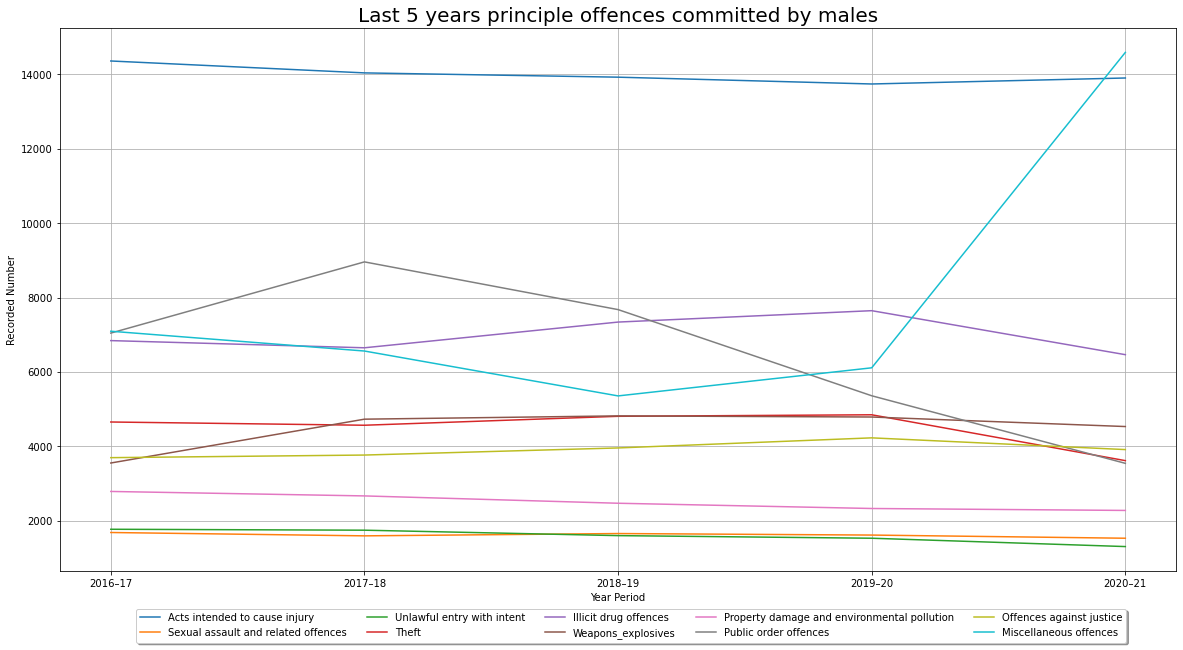

In [7]:
# Line graph to show trend in the last 5 years
# Removing offences not in the top 10
for exCol in least_offence_male:
    vic_male_offenders = vic_male_offenders.drop(exCol, axis=1, errors='ignore')

# Plotting graph
plt.figure(figsize=(20, 10))
for col in vic_male_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total' or col == 'exCol'):
        plt.plot(vic_male_offenders['Year_Period'], vic_male_offenders[col], label= col)
plt.title(f"Last 5 years principle offences committed by males", fontsize=20)
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.96, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()


# Principal Offences by Female

In [8]:
# data breakdown
# Retrieving last 5 years of female data
vic_female_offenders = vic_offenders.loc[(vic_offenders['Gender'] == "Female")].sort_values('Year_Period', ascending=True).tail()
vic_female_offenders.describe()

,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,22.600000,3419.800000,80.600000,148.400000,296.000000,96.40000,348.600000,3378.600000,254.000000,833.800000,2060.400000,843.000000,580.000000,1152.200000,1011.600000,1957.000000,16483.000000
std,6.107373,61.120373,4.560702,15.093045,32.457665,22.54551,34.602023,541.070513,81.786307,61.296003,137.360111,103.164917,35.057096,370.100932,93.548383,1779.483211,870.866235
min,17.000000,3343.000000,73.000000,123.000000,259.000000,62.00000,291.000000,2453.000000,111.000000,727.000000,1931.000000,687.000000,535.000000,657.000000,866.000000,814.000000,15849.000000
25%,18.000000,3378.000000,81.000000,149.000000,264.000000,87.00000,344.000000,3437.000000,261.000000,840.000000,1939.000000,792.000000,559.000000,889.000000,980.000000,1039.000000,15943.000000
50%,20.000000,3431.000000,81.000000,151.000000,307.000000,106.00000,359.000000,3476.000000,294.000000,856.000000,2045.000000,886.000000,577.000000,1278.000000,1032.000000,1305.000000,16273.000000
75%,27.000000,3447.000000,83.000000,157.000000,322.000000,107.00000,374.000000,3713.000000,297.000000,870.000000,2129.000000,912.000000,609.000000,1375.000000,1083.000000,1523.000000,16357.000000
max,31.000000,3500.000000,85.000000,162.000000,328.000000,120.00000,375.000000,3814.000000,307.000000,876.000000,2258.000000,938.000000,620.000000,1562.000000,1097.000000,5104.000000,17993.000000


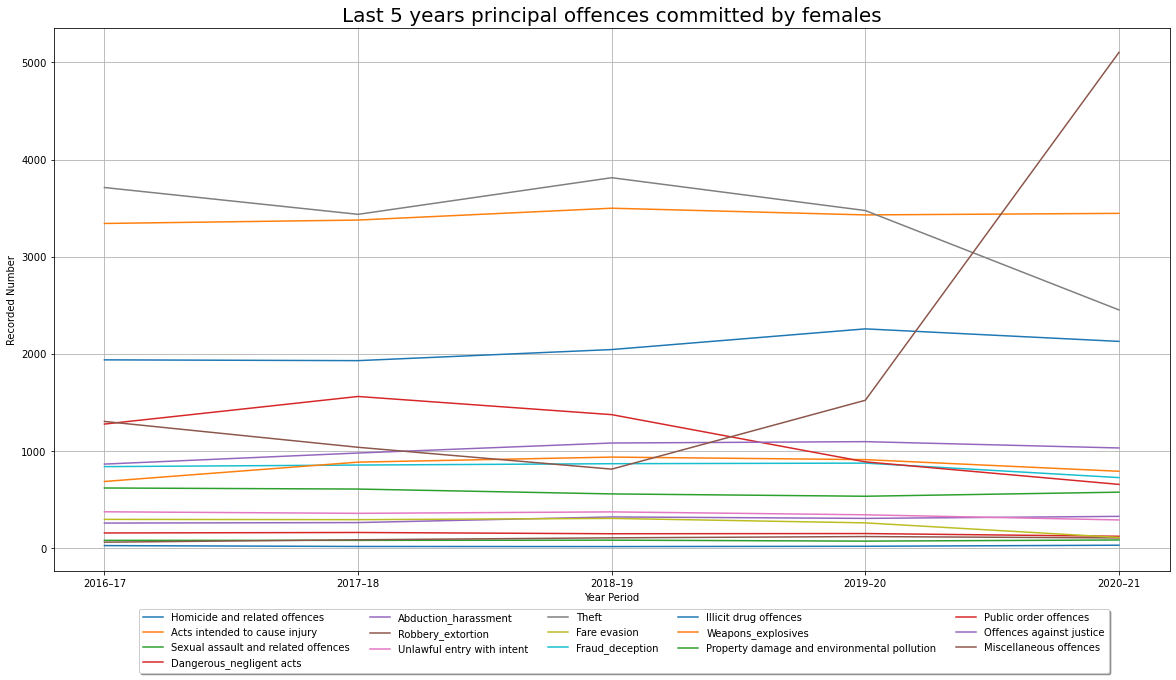

In [9]:
# Line graph to show trend in the last 5 years
plt.figure(figsize=(20, 10))
for col in vic_female_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total'):
        plt.plot(vic_female_offenders['Year_Period'], vic_female_offenders[col], label= col)

plt.title(f"Last 5 years principal offences committed by females", fontsize=20)
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.95, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()


In [10]:
least_offence_female = []
# Top 10 crimes by female
vic_female_offenders_tally = vic_female_offenders.drop(['Year_Period', 'Gender', 'Total'], axis=1).sum().sort_values(ascending=False).reset_index()
vic_female_offenders_tally = vic_female_offenders_tally.rename(columns={'index': 'Principal Offences', 0: 'Total Count'})
top10Crimes_female = vic_female_offenders_tally.head(10)

# Load least commited offences into a list
for i in np.arange(10, len(vic_female_offenders_tally)):
    least_offence_female.append(vic_female_offenders_tally['Principal Offences'][i])

    # Show top 10 Principal Offences
top10Crimes_female

,Principal Offences,Total Count
0,Acts intended to cause injury,17099
1,Theft,16893
2,Illicit drug offences,10302
3,Miscellaneous offences,9785
4,Public order offences,5761
5,Offences against justice,5058
6,Weapons_explosives,4215
7,Fraud_deception,4169
8,Property damage and environmental pollution,2900
9,Unlawful entry with intent,1743


## Top 10 Principal Offences by female

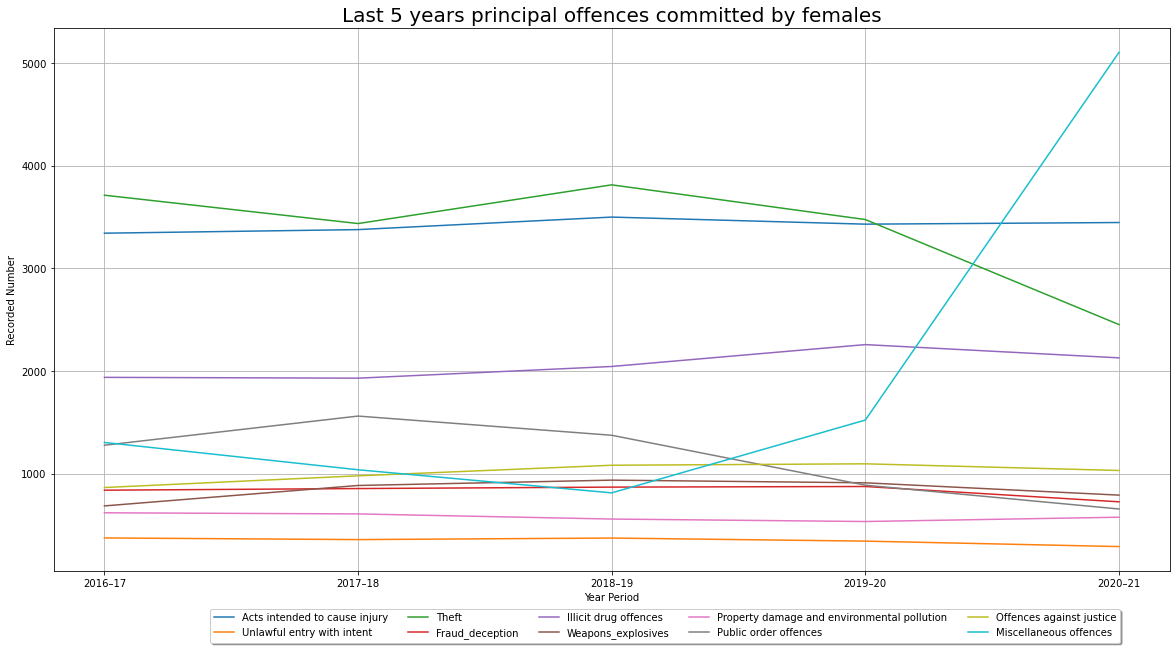

In [11]:
# Line graph to show trend in the last 5 years
# Removing offences not in the top 10
for exCol in least_offence_female:
    vic_female_offenders = vic_female_offenders.drop(exCol, axis=1, errors='ignore')

# Plotting graph
plt.figure(figsize=(20, 10))
for col in vic_female_offenders.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total' or col == 'exCol'):
        plt.plot(vic_female_offenders['Year_Period'], vic_female_offenders[col], label= col)
plt.title(f"Last 5 years principal offences committed by females", fontsize=20)
plt.xlabel("Year Period")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.96, -0.06), fancybox=True, shadow=True, ncol=5)
plt.show()

In [12]:
vic_male_current = vic_male_offenders.tail(1)
vic_female_current = vic_female_offenders.tail(1)

# 2020 - 2021 Overview

In [13]:
vic_male_current_p = pd.DataFrame({'offences': vic_male_current.drop(['Year_Period', 'Gender', 'Total'], axis =1, errors = 'ignore').columns, 
                                'Gender': 'Male'})
vic_male_current_p['count'] = 0
for i in np.arange(0, len(vic_male_current_p)):
    offence_name = vic_male_current_p['offences'][i]
    for index, row in vic_male_current.iterrows():
        vic_male_current_p.loc[i, 'count'] = row[offence_name]
        
vic_female_current_p = pd.DataFrame({'offences': vic_female_current.drop(['Year_Period', 'Gender', 'Total'], axis =1, errors = 'ignore').columns, 
                                'Gender': 'Female'})
vic_female_current_p['count'] = 0
for i in np.arange(0, len(vic_female_current_p)):
    offence_name = vic_female_current_p['offences'][i]
    for index, row in vic_female_current.iterrows():
        vic_female_current_p.loc[i, 'count'] = row[offence_name]
        

complete_offenders = pd.concat([vic_male_current_p, vic_female_current_p])


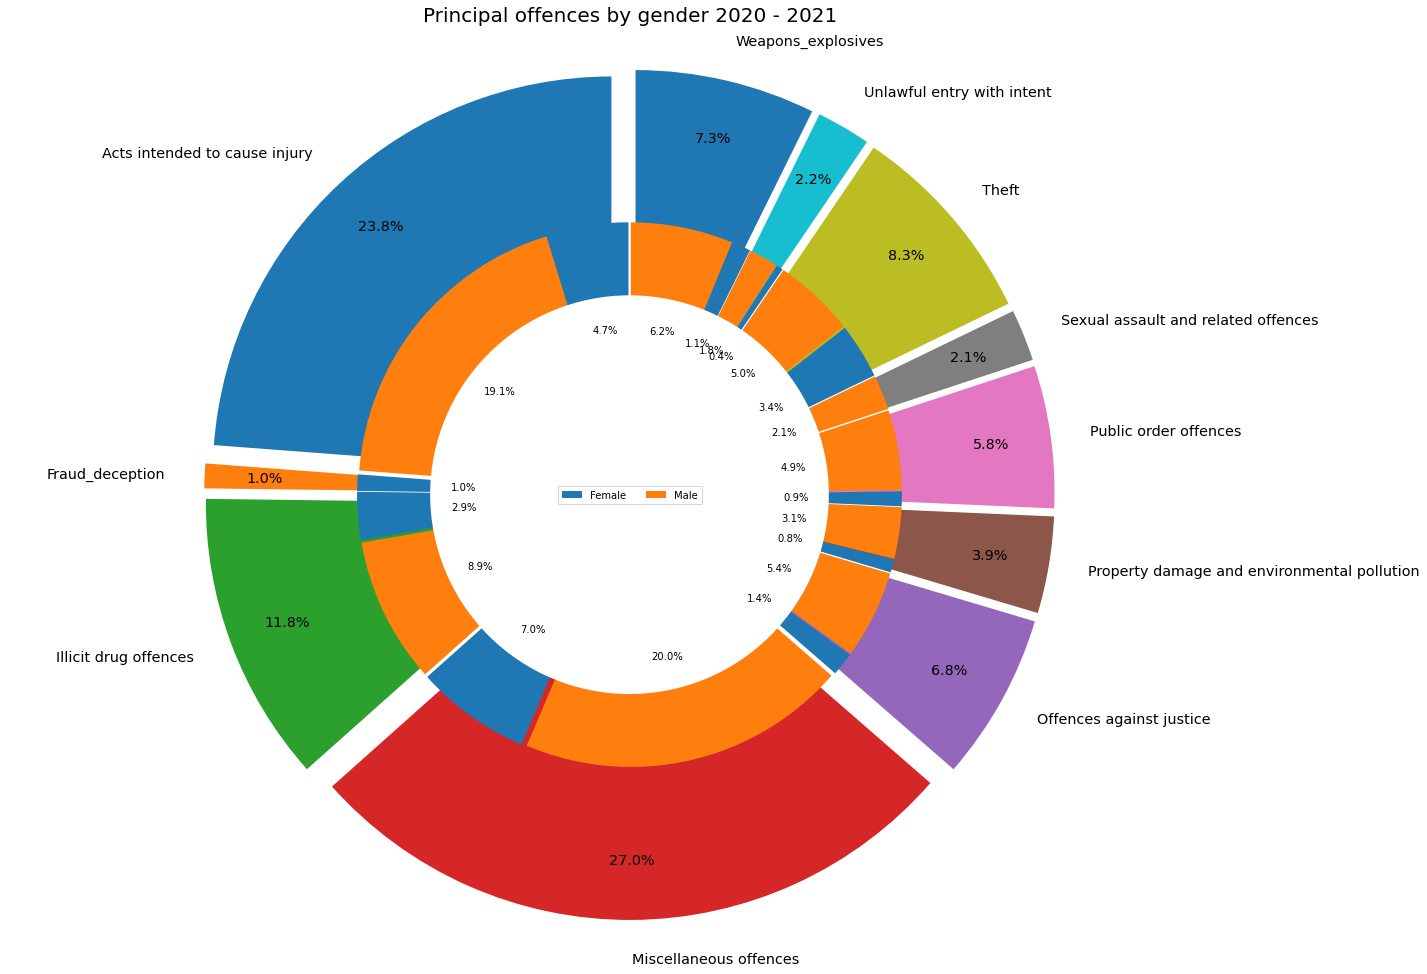

In [14]:
# Data to plot
group_data_outer = pd.DataFrame(complete_offenders.groupby(['offences'])['count'].sum()).reset_index()
group_data_inner = pd.DataFrame(complete_offenders.groupby(['offences', 'Gender'])['count'].sum())

#Setting Labels
labels_outer = group_data_outer['offences']
data_outer = group_data_outer['count']

labels_inner = group_data_inner.reset_index()['Gender']
data_inner = group_data_inner['count']
labels_inner_legend= list(dict.fromkeys(labels_inner))

# Setting colours
colours_inner = []
for gender in labels_inner:
    if gender == "Female":
        colours_inner.append('tab:blue')
    else:
        colours_inner.append('tab:orange')

# colours_outer = [plt.cm.coolwarm(x) for x in np.arange(0, len(group_data_outer))]

# Set explode value
explode_outer = [0.2 for x in np.arange(0, len(group_data_outer))]
explode_inner = [0.05 for x in np.arange(0, len(group_data_inner))]

#Plot
plt.figure(figsize=(20,15))
plt.pie(data_outer,  labels=labels_outer, startangle=90,frame=True, explode=explode_outer, radius=3, 
        pctdistance=0.85, autopct='%.1f%%',  textprops={'size': 'x-large'})
plt.pie(data_inner, colors= colours_inner, startangle=90, explode=explode_inner, radius=2, autopct='%.1f%%')

#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.legend(labels_inner_legend, loc='center', fancybox=False, shadow=False, ncol=4)
plt.title('Principal offences by gender 2020 - 2021', fontsize=20)
plt.subplots_adjust(top=0.88)
plt.savefig("Images\Principal offences by gender 2020 - 2021.PNG", facecolor="white")
plt.show()

In [15]:
complete_5_years = vic_offenders.sort_values(['Year_Period', 'Gender'], ascending=True).tail(10).reset_index(drop=True)
complete_5_years

,Year_Period,Gender,Homicide and related offences,Acts intended to cause injury,Sexual assault and related offences,Dangerous_negligent acts,Abduction_harassment,Robbery_extortion,Unlawful entry with intent,Theft,Fare evasion,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
0,2016–17,Female,27,3343,81,157,259,62,375,3713,297,840,1939,687,620,1278,866,1305,15849
1,2016–17,Male,94,14355,1686,896,1350,468,1773,4655,1721,1550,6842,3553,2789,7044,3697,7094,59567
2,2017–18,Female,18,3378,81,162,264,87,359,3437,294,856,1931,886,609,1562,980,1039,15943
3,2017–18,Male,137,14035,1596,796,1311,525,1748,4568,1713,1554,6649,4731,2669,8957,3767,6562,61318
4,2018–19,Female,17,3500,83,149,322,107,374,3814,307,870,2045,938,559,1375,1083,814,16357
5,2018–19,Male,123,13920,1658,800,1394,564,1602,4808,1482,1671,7340,4819,2472,7675,3958,5356,59642
6,2019–20,Female,20,3431,73,151,307,120,344,3476,261,876,2258,912,535,889,1097,1523,16273
7,2019–20,Male,126,13737,1617,760,1462,683,1532,4849,1010,1670,7646,4789,2331,5360,4229,6111,57912
8,2020–21,Female,31,3447,85,123,328,106,291,2453,111,727,2129,792,577,657,1032,5104,17993
9,2020–21,Male,131,13898,1532,767,1598,379,1308,3617,516,1485,6464,4533,2279,3544,3914,14586,60551


In [16]:
offences_list =[]
offences_count = []
offences_female = []
offences_male = []
# offences_list['count'] = 0
for col in complete_5_years.columns:
    if not (col == 'Year_Period' or col == 'Gender' or col == 'Total'):
        overallperc = complete_5_years[col].sum() / complete_5_years['Total'].sum()
        if overallperc < 0.025:
            complete_5_years =complete_5_years.drop(col, axis=1, errors='ignore')
        else:
            offences_list.append(col)
            for index, row in complete_5_years.iterrows():
                if row['Gender'] == 'Female':
                    offences_female.append(row[col])
                else:
                    offences_male.append(row[col])
complete_5_years

,Year_Period,Gender,Acts intended to cause injury,Unlawful entry with intent,Theft,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
0,2016–17,Female,3343,375,3713,840,1939,687,620,1278,866,1305,15849
1,2016–17,Male,14355,1773,4655,1550,6842,3553,2789,7044,3697,7094,59567
2,2017–18,Female,3378,359,3437,856,1931,886,609,1562,980,1039,15943
3,2017–18,Male,14035,1748,4568,1554,6649,4731,2669,8957,3767,6562,61318
4,2018–19,Female,3500,374,3814,870,2045,938,559,1375,1083,814,16357
5,2018–19,Male,13920,1602,4808,1671,7340,4819,2472,7675,3958,5356,59642
6,2019–20,Female,3431,344,3476,876,2258,912,535,889,1097,1523,16273
7,2019–20,Male,13737,1532,4849,1670,7646,4789,2331,5360,4229,6111,57912
8,2020–21,Female,3447,291,2453,727,2129,792,577,657,1032,5104,17993
9,2020–21,Male,13898,1308,3617,1485,6464,4533,2279,3544,3914,14586,60551


In [17]:
complete_5_years.describe()

,Acts intended to cause injury,Unlawful entry with intent,Theft,Fraud_deception,Illicit drug offences,Weapons_explosives,Property damage and environmental pollution,Public order offences,Offences against justice,Miscellaneous offences,Total
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,8704.400000,970.600000,3939.000000,1209.900000,4524.300000,2664.000000,1544.00000,3834.100000,2462.300000,4949.400000,38140.500000
std,5572.726566,667.922184,770.029725,402.263443,2619.397388,1953.299146,1026.74372,3166.200683,1536.596676,4203.398313,22852.227697
min,3343.000000,291.000000,2453.000000,727.000000,1931.000000,687.000000,535.00000,657.000000,866.000000,814.000000,15849.000000
25%,3435.000000,362.750000,3511.250000,859.500000,2066.000000,892.500000,585.00000,1302.250000,1044.750000,1359.500000,16294.000000
50%,8618.500000,841.500000,3763.500000,1180.500000,4361.000000,2245.500000,1449.50000,2553.000000,2397.000000,5230.000000,37952.500000
75%,13914.500000,1584.500000,4633.250000,1553.000000,6793.750000,4681.500000,2436.75000,6623.000000,3877.250000,6449.250000,59623.250000
max,14355.000000,1773.000000,4849.000000,1671.000000,7646.000000,4819.000000,2789.00000,8957.000000,4229.000000,14586.000000,61318.000000


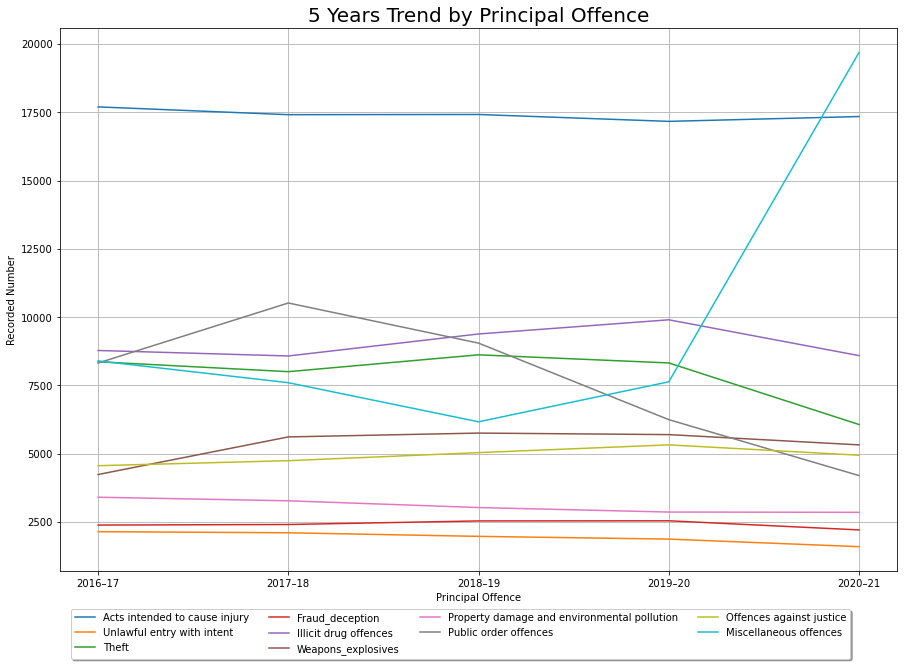

In [44]:
complete_5_years=complete_5_years.drop('Gender', axis=1, errors='ignore')
complete_5_years = complete_5_years.groupby('Year_Period').sum().reset_index()

plt.figure(figsize=(15, 10))
for col in complete_5_years.columns:
    if not (col == "Total" or col == 'Year_Period'):
        plt.plot(complete_5_years['Year_Period'], complete_5_years[col], label= col)
plt.title(f"5 Years Trend by Principal Offence", fontsize=20)
plt.xlabel("Principal Offence")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.95, -0.06), fancybox=True, shadow=True, ncol=4)
plt.savefig("Images\Five years trend by Principal Offence.PNG", facecolor="white", dpi=300)
plt.show()

## Gender by Age

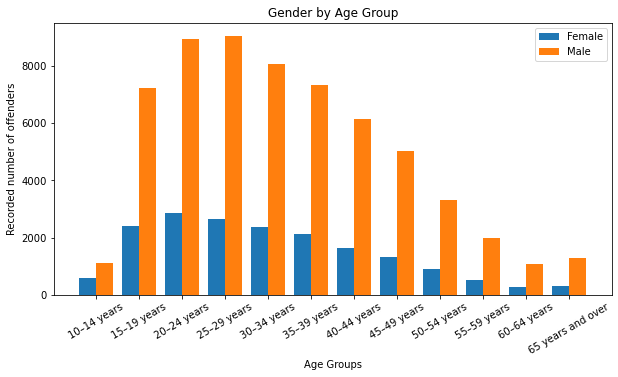

In [38]:
filename = "Offenders_Gender_and_Age.csv"
file = f"resources\{filename}"
vic_offenders_age = pd.read_csv(file)
vic_offenders_age_data = vic_offenders_age[['Gender', 'Age Group', 'Vic.']]

x = list(dict.fromkeys(vic_offenders_age_data['Age Group']))
y_female = vic_offenders_age_data.loc[(vic_offenders_age_data['Gender'] == 'Female') , 'Vic.'].tolist()
y_male = vic_offenders_age_data.loc[(vic_offenders_age_data['Gender'] == 'Male') , 'Vic.'].tolist()
x_axis = np.arange(len(x))
plt.figure(figsize = (10, 5))
plt.bar(x_axis - 0.2, y_female, 0.4, label = 'Female')
plt.bar(x_axis + 0.2, y_male, 0.4, label = "Male")

plt.xticks(x_axis, x, rotation = 30)
plt.xlabel("Age Groups")
plt.ylabel("Recorded number of offenders")
plt.title("Gender by Age Group")
plt.legend()

plt.savefig("Images\Principal offences by gender and Age Group 2020 - 2021.PNG", facecolor="white", dpi=300, bbox_inches='tight')
plt.show()

In [23]:
filename = "Youth_offender_age.csv"
file = f"resources\{filename}"
yoffenders_age = pd.read_csv(file)

# Setting up file to include combined Male & Female total
yoffenders_age_total = yoffenders_age.groupby('principal offence').sum().reset_index()
yoffenders_age_total['Gender'] = 'Overall'
yoffenders_age = pd.concat([yoffenders_age, yoffenders_age_total]).reset_index(drop=True)
yoffenders_age
# Calculating percentage
yoffenders_age['10 years perc'] = 0.00
yoffenders_age['11 years perc'] = 0.00
yoffenders_age['12 years perc'] = 0.00
yoffenders_age['13 years perc'] = 0.00
yoffenders_age['14 years perc'] = 0.00
yoffenders_age['15 years perc'] = 0.00
yoffenders_age['16 years perc'] = 0.00
yoffenders_age['17 years perc'] = 0.00
for index, row in yoffenders_age.iterrows():
#     total = 0
    yoffenders_age.loc[index, 'Youth Percentage'] = row['Youth offenders'] / row['All offenders']
    for col in yoffenders_age.columns:
        if (col.find('years') > 0) and (col.find('perc') == -1):
            update_field = col + ' perc'
            yoffenders_age.loc[index, update_field] = row[col]/row['Youth offenders']
            total = total + row[col]
#     yoffenders_age.loc[index, 'Youth offenders new'] = total
#     yoffenders_age.loc[index, 'Youth Percentage new'] = total/row['All offenders']

# Principal offences that contribute over 10% to the overall statistic
y_10Perc_offence = yoffenders_age.loc[(yoffenders_age['Youth Percentage'] >= 0.1), :]
y_10Perc_total = y_10Perc_offence.loc[(y_10Perc_offence['Gender'] == 'Overall'), :]
y_10Perc_total

,principal offence,Gender,10 years,11 years,12 years,13 years,14 years,15 years,16 years,17 years,...,All offenders,10 years perc,11 years perc,12 years perc,13 years perc,14 years perc,15 years perc,16 years perc,17 years perc,Youth Percentage
31,Acts intended to cause injury,Overall,87,206,602,1204,1746,2027,2038,1921,...,82897,0.008839,0.020929,0.061160,0.122320,0.177385,0.205933,0.207051,0.195164,0.118738
32,Dangerous_negligent acts,Overall,3,9,11,24,28,28,53,49,...,2012,0.013699,0.041096,0.050228,0.109589,0.127854,0.127854,0.242009,0.223744,0.108847
38,Property damage and environmen,Overall,93,117,230,370,437,509,476,527,...,14503,0.033720,0.042422,0.083394,0.134155,0.158448,0.184554,0.172589,0.191080,0.190168
39,Public order offences,Overall,31,60,160,372,521,734,851,1079,...,38043,0.008134,0.015744,0.041984,0.097612,0.136710,0.192600,0.223301,0.283128,0.100176
40,Robbery_extortion,Overall,9,14,62,164,274,340,306,256,...,3341,0.006298,0.009797,0.043387,0.114766,0.191742,0.237929,0.214136,0.179146,0.427716
41,Sexual assault and related off,Overall,9,19,128,267,321,270,252,200,...,8976,0.006177,0.013040,0.087852,0.183253,0.220316,0.185312,0.172958,0.137268,0.162322
42,Theft,Overall,59,122,292,671,959,1141,1115,843,...,31096,0.011344,0.023457,0.056143,0.129014,0.184388,0.219381,0.214382,0.162084,0.167256
43,Unlawful entry with intent,Overall,119,184,316,466,641,631,552,455,...,10186,0.035312,0.054599,0.093769,0.138279,0.190208,0.187240,0.163798,0.135015,0.330846


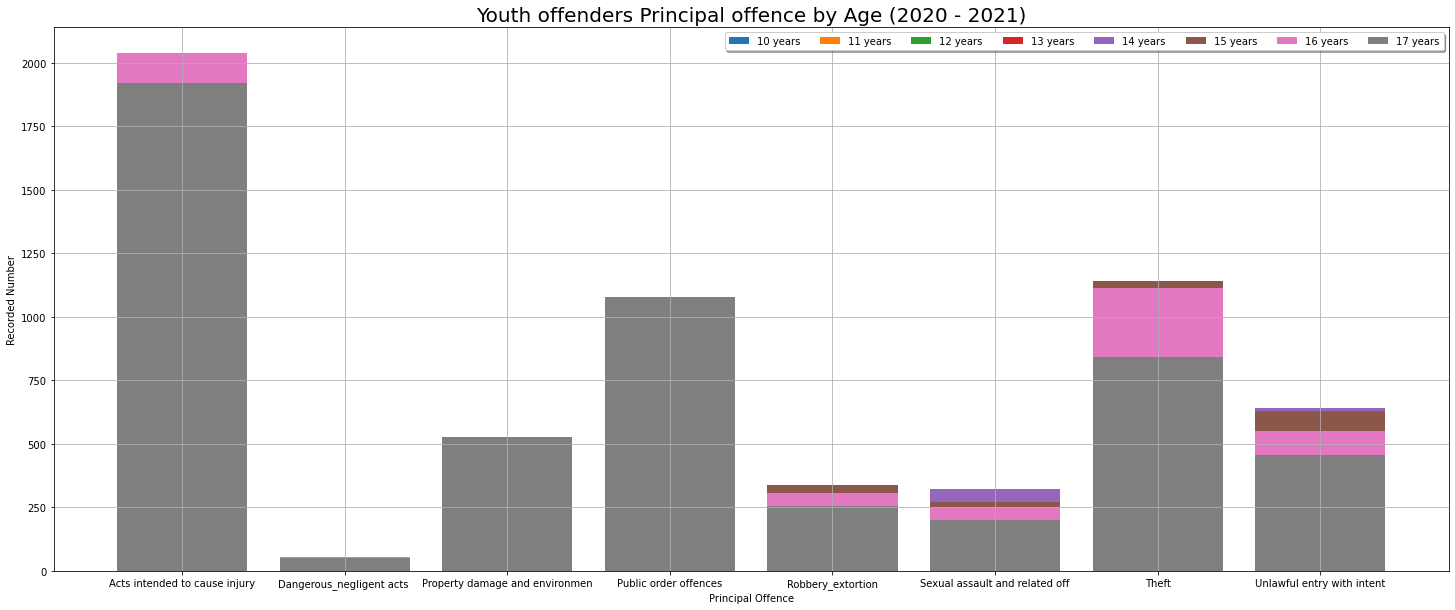

In [26]:
# Plotting graph
plt.figure(figsize=(25, 10))
for col in y_10Perc_total.columns:
    if (col.find('years') > 0 and col.find('perc') == -1):
        plt.bar(y_10Perc_total['principal offence'], y_10Perc_total[col], label= col)
plt.title(f"Youth offenders Principal offence by Age (2020 - 2021)", fontsize=20)
plt.xlabel("Principal Offence")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(loc='best', fancybox=True, shadow=True, ncol=8)
plt.savefig("Images\Youth offenders Principal offence by Age.PNG", facecolor="white")
plt.show()

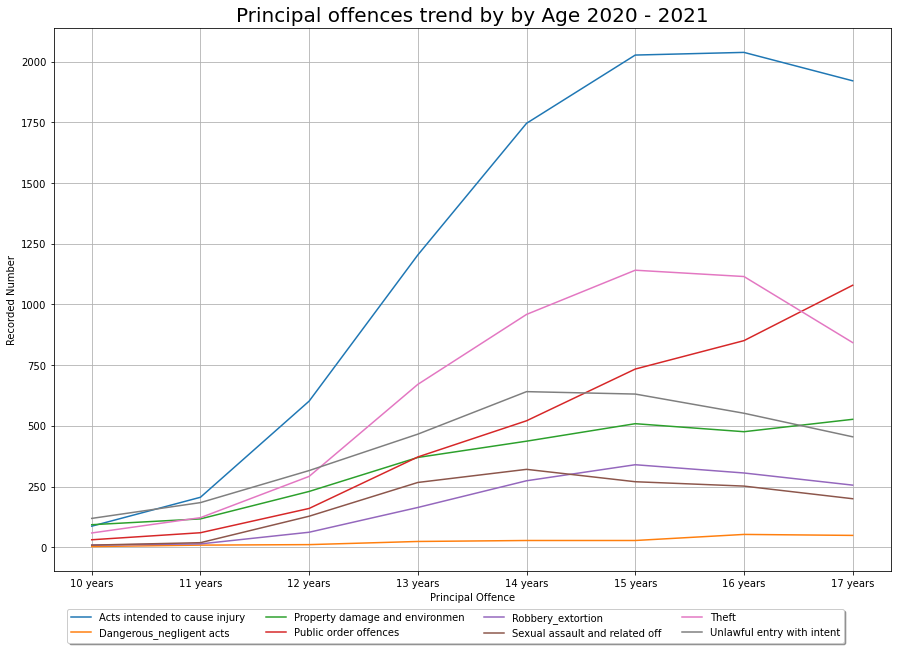

In [39]:
# Collatie data
y_10_pv = pd.pivot_table(y_10Perc_total, values='10 years', columns=['principal offence'], aggfunc=np.sum)
y_11_pv = pd.pivot_table(y_10Perc_total, values='11 years', columns=['principal offence'], aggfunc=np.sum)
y_12_pv = pd.pivot_table(y_10Perc_total, values='12 years', columns=['principal offence'], aggfunc=np.sum)
y_13_pv = pd.pivot_table(y_10Perc_total, values='13 years', columns=['principal offence'], aggfunc=np.sum)
y_14_pv = pd.pivot_table(y_10Perc_total, values='14 years', columns=['principal offence'], aggfunc=np.sum)
y_15_pv = pd.pivot_table(y_10Perc_total, values='15 years', columns=['principal offence'], aggfunc=np.sum)
y_16_pv = pd.pivot_table(y_10Perc_total, values='16 years', columns=['principal offence'], aggfunc=np.sum)
y_17_pv = pd.pivot_table(y_10Perc_total, values='17 years', columns=['principal offence'], aggfunc=np.sum)
y_pv = pd.concat([y_10_pv, y_11_pv, y_12_pv, y_13_pv, y_14_pv, y_15_pv, y_16_pv, y_17_pv]).reset_index()
y_pv=y_pv.rename(columns={'index': 'Age'})

# Plot data
plt.figure(figsize=(15, 10))
for col in y_10_pv.columns:
    if not (col == "principal offence"):
        plt.plot(y_pv['Age'], y_pv[col], label= col)
plt.title(f"Principal offences trend by by Age 2020 - 2021", fontsize=20)
plt.xlabel("Principal Offence")
plt.ylabel("Recorded Number")
plt.grid(True)
plt.legend(bbox_to_anchor=(0.95, -0.06), fancybox=True, shadow=True, ncol=4)
plt.savefig("Images\Principal offences trend by by Age 2020 - 2021.PNG", facecolor="white")
plt.show()